# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 9:
- Event Analysis: solve business question related to hypothesis testing.
- Competition Analysis: Performing descriptive analysis using various data analysis and visualization techniques.
- Writing interpretation for each analysis individually.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


# A) Event Analysis
## Is there a significant difference in the average number of goals scored by home and away teams in matches?

In [17]:
from scipy.stats import ttest_ind

home_goals = data['home_club_goals']
away_goals = data['away_club_goals']

In [19]:
# Perform independent T-test
t_stat, p_value = ttest_ind(home_goals, away_goals, nan_policy='omit')

# Results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: 10.17
P-Value: 0.0000


In [21]:
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in goals scored by home and away teams.")
else:
    print("Fail to reject the null hypothesis: No significant difference in goals scored by home and away teams.")

Reject the null hypothesis: There is a significant difference in goals scored by home and away teams.


### Interpretation:
- If P < 0.05: The difference in average goals scored by home and away teams is statistically significant.

# B) Competition Analysis
## How do the average goals scored in home and away matches vary across different seasons?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by season and calculate mean goals
season_goals = data.groupby('season').agg({'home_club_goals': 'mean','away_club_goals': 'mean'}).reset_index()

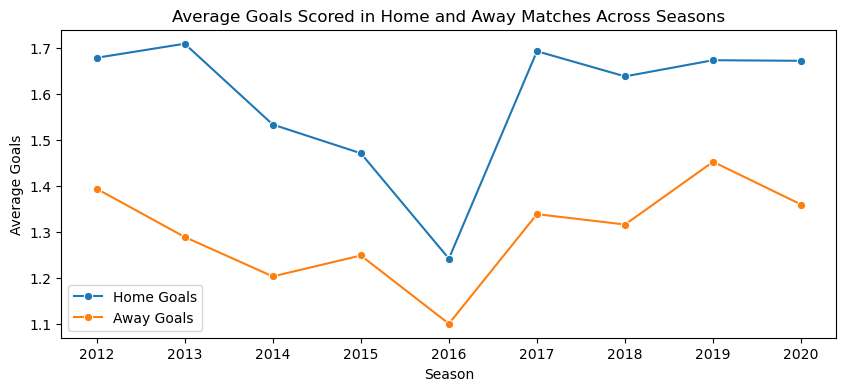

In [3]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=season_goals, x='season', y='home_club_goals', marker='o', label='Home Goals')
sns.lineplot(data=season_goals, x='season', y='away_club_goals', marker='o', label='Away Goals')
plt.title("Average Goals Scored in Home and Away Matches Across Seasons")
plt.xlabel("Season")
plt.ylabel("Average Goals")
plt.legend()
plt.show()

### Interpretation:
- The plot shows trends in goals scored at home and away for each season, helping identify patterns or anomalies.
- Teams might perform significantly better or worse in certain seasons, which could be linked to player changes, managerial strategies, or other external factors